In [1]:
import biolqm
import maboss

import matplotlib.pyplot as plt

# Toy model at the single-cell level

The following introduces a toy model accounting for a cellular receptor (R) which can activate competing downstream components (B through T, or A directly).
B can further activate the component C, but only in absence of T, which is upstream of B.

In the next cells, we show the model and load it into maboss. We then show that a simulation starting with an active receptor can lead to the exclusive activation of A or B, unless the receptor is disabled first, which leads to a naive state. In this configuration, C can never be activated.

In [2]:
!cat toy.bnet

Bi, Bi
R,  0
T,  R | B
A,  (A | R) & !C & !B
B,  T & !A
C,  (C | B | Bi) & !A & !T


In [3]:
m = biolqm.load('toy.bnet')
mbs = biolqm.to_maboss(m)

maboss.set_output(mbs, ["T", "A", "B", "C", "R"])
mbs.update_parameters(max_time=20)

CPU times: user 0 ns, sys: 8.91 ms, total: 8.91 ms
Wall time: 223 ms


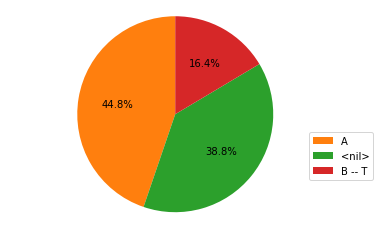

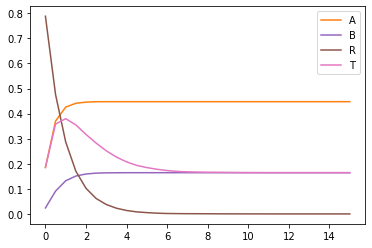

In [4]:
maboss.set_nodes_istate(mbs, ["R"], [0, 1])
%time r = mbs.run()

# Plot the piechart and trajectories
r.plot_piechart()
r.plot_node_trajectory(until=15)

# save pdf versions of the plots
r._piefig.savefig("single_pie.pdf")
r._ndtraj.savefig("single_traj.pdf")

# Add rules for the population


Here we extend the previous model to take into account an additional population effect: when a cell produces B, it can be secreted and act on neighbour cells as well. As these other cells may not have an active T component, B will then be able to activate C in these cells.

We show that this effect leads to the replacement of naive cells with cells expressing C.
The cells expressing C could not be predicted by the single-cell model, however, they are widespread in the population.

CPU times: user 294 ms, sys: 443 ms, total: 736 ms
Wall time: 7.41 s


(0.0, 1.1)

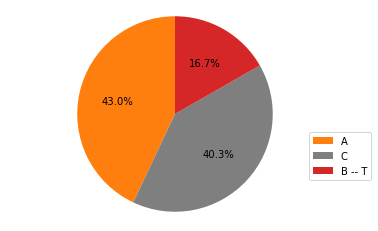

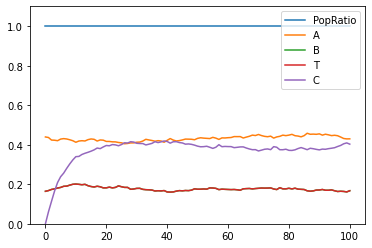

In [8]:
mbs.update_parameters(max_time=20, time_tick=1)
umbs = maboss.UpdatePopulation(mbs)
umbs.setNodeFormula('Bi', 'p[(B) = (1)]')
umbs.setStepNumber(100)

%time ur = umbs.run()

ur.results[-1].plot_piechart()
ur.results[-1]._piefig.savefig("pop_pie.pdf")


traj = ur.get_nodes_stepwise_probability_distribution()
p = traj.plot()

# no need for the population ratio in the saved figure
p.set_ylim(0,0.8)

p.get_figure().savefig("pop_traj.pdf")
p.set_ylim(0,1.1)

# Adjust the tomescale of population feedback

In the previous simulation of the population, we used the same timescale for the core model as in the single cell model. In this setting, the cells first reach a stable configuration before getting external signal. However, the cell-to-cell communication could happen earlier.

Here we run another population simulation in which we reduced the length of single-cell simulation and increased the number of steps in the population simulation. In this case it leads to similar results, but the timescale parameters could have stronger effects in other models.

CPU times: user 312 ms, sys: 415 ms, total: 726 ms
Wall time: 7.59 s


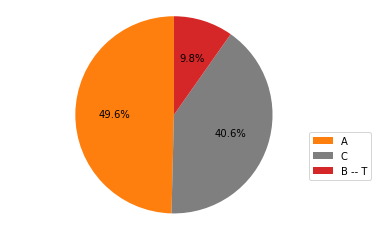

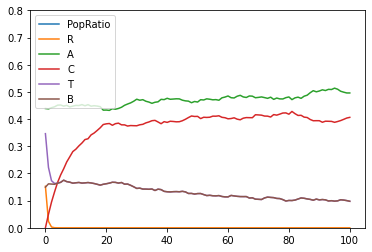

In [6]:
mbs.update_parameters(max_time=2, time_tick=0.1)
umbs = maboss.UpdatePopulation(mbs)
umbs.setNodeFormula('Bi', 'p[(B) = (1)]')
umbs.setStepNumber(100)

%time ur = umbs.run()

ur.results[-1].plot_piechart()
ur.results[-1]._piefig.savefig("fast_pop_pie.pdf")


traj = ur.get_nodes_stepwise_probability_distribution()
p = traj.plot()
p.get_figure().savefig("fast_pop_traj.pdf")